In [2]:
# import dependencies
import pandas as pd

In [3]:
# load dataset
input_file = 'C:/Users/AbdouAA/Work Folders/Documents/GitHub/k2-respunkt/data/OD_data_dynamic.xlsx'

# Read specific sheets by name
df_sheet1 = pd.read_excel(input_file, sheet_name='Sheet1')
df_sheet2 = pd.read_excel(input_file, sheet_name=1)  # Second sheet



# Static OD

## All stations of the commuter rail network

            Bkb        Bro        Bål         Fas         Flb         Gn  \
Tåd   21.556270   5.563321   4.610046   46.854996   92.096712   1.768770   
Jkb  261.941973  83.247964  68.981269   92.570087  290.636255   5.582008   
Sst  207.119125  53.454065  44.262951  201.742857  634.327830  12.183005   

          Gdv         Hnd         Hel       Hfa  ...          Tu        Ts  \
Tåd  2.075474   84.488936   29.182294  0.669376  ...   47.045729  2.387341   
Jkb  3.603629  146.702053  259.662822  1.162268  ...  148.465609  4.145122   
Sst  7.853823  319.715494  280.497201  2.532992  ...  324.043551  9.033964   

            Udl         Upv          U         Vhe         Åbe          Äs  \
Tåd   22.362470   28.733169   6.071464   41.139565   88.607882  132.642798   
Jkb  126.809514  162.960856  29.964590   71.430305  330.628645  419.021430   
Sst  214.945757  276.180254  50.790838  155.676672  720.556381  913.337811   

           Öso         Öte  
Tåd   5.319186   34.210748  
Jkb   9.235

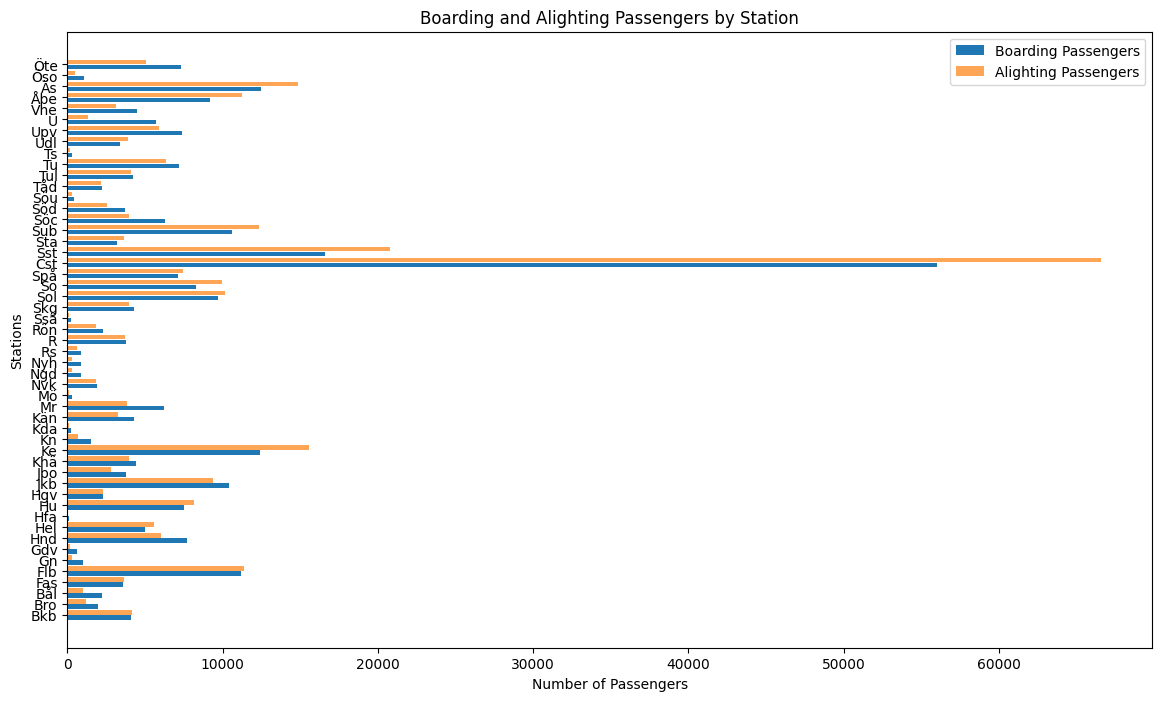

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Read the Excel file and specify the sheet name
df = pd.read_excel(input_file, sheet_name='Static', index_col=0, header=0)

# Basic data explorations
print(df.sample(3))

# Calculate boarding and alighting passengers
boarding_passengers = df.sum(axis=1)
alighting_passengers = df.sum(axis=0)

# Define the position of the bars
index = np.arange(len(df.index))
bar_width = 0.4  # Width of the bars
spacing = 0.05  # Spacing between the bars

fig, ax = plt.subplots(figsize=(14, 8))

# Bar plot for boarding passengers
boarding_bars = ax.barh(index - (bar_width / 2 + spacing / 2), boarding_passengers, bar_width, color='tab:blue', label='Boarding Passengers')

# Bar plot for alighting passengers
alighting_bars = ax.barh(index + (bar_width / 2 + spacing / 2), alighting_passengers, bar_width, color='tab:orange', alpha=0.7, label='Alighting Passengers')

# Add labels and title
ax.set_xlabel('Number of Passengers')
ax.set_yticks(index)
ax.set_yticklabels(df.index)
ax.set_ylabel('Stations')
ax.set_title('Boarding and Alighting Passengers by Station')

# Add a legend
ax.legend()

# Show plot
plt.show()

## Function to update/adjust static OD data for the specific studied line between Nyh and Bål

In [5]:
import pandas as pd 

# Groups of stations
#C_stations = ['Äs', 'Åbe', 'Sst', 'Cst', 'Ke'] # central stations

def update_OD_Nyh_Bal(df):
    # Define station groups
    R35_stations = ['Nyh', 'Gdv', 'Ngd', 'Öso', 'Ssä', 'Hfa', 'Ts', 'Kda', 'Vhe', 'Jbo', 'Hnd', 'Skg', 'Tåd', 'Fas'] # eastern/right stations of line 35
    L35_stations = ['Sub', 'Spå', 'Bkb', 'Jkb', 'Khä', 'Kän', 'Bro', 'Bål'] # western/left stations of line 35
    R36_stations = ['Söc', 'Söd', 'Söu', 'Tul', 'Tu', 'Öte', 'Flb', 'Gn', 'Hu', 'Mö', 'Rön', 'Sta'] # eastern/right stations of line 36
    L36_stations = ['Sol', 'So', 'Udl', 'Upv', 'U', 'Hel', 'Hgv' , 'Kn', 'Mr', 'Nvk', 'Rs', 'R'] # western/left stations of line 36

    # Create a copy of the DataFrame to avoid modifying the original
    df_updated = df.copy()
    
    # Process trips from 35L to 36L
    for origin in L35_stations:
        for destination in L36_stations:
            df_updated.at[origin, 'Ke'] += df.at[origin, destination]
            df_updated.at[origin, destination] = 0
    
    # Process trips from 35L to 36R
    for origin in L35_stations:
        for destination in R36_stations:
            df_updated.at[origin, 'Äs'] += df.at[origin, destination]
            df_updated.at[origin, destination] = 0
            
    # Process trips from 35R to 36L
    for origin in R35_stations:
        for destination in L36_stations:
            df_updated.at[origin, 'Ke'] += df.at[origin, destination]
            df_updated.at[origin, destination] = 0
    
    # Process trips from 35R to 36R
    for origin in R35_stations:
        for destination in R36_stations:
            df_updated.at[origin, 'Äs'] += df.at[origin, destination]
            df_updated.at[origin, destination] = 0
    
    # Process trips from 36L to 35L
    for origin in L36_stations:
        for destination in L35_stations:
            df_updated.at['Ke', destination] += df.at[origin, destination]
            df_updated.at[origin, destination] = 0
            
    # Process trips from 36L to 35R
    for origin in L36_stations:
        for destination in R35_stations:
            df_updated.at['Äs', destination] += df.at[origin, destination]
            df_updated.at[origin, destination] = 0
            
    # Process trips from 36R to 35L
    for origin in R36_stations:
        for destination in L35_stations:
            df_updated.at['Ke', destination] += df.at[origin, destination]
            df_updated.at[origin, destination] = 0
    
    # Process trips from 36R to 35R
    for origin in R36_stations:
        for destination in R35_stations:
            df_updated.at['Äs', destination] += df.at[origin, destination]
            df_updated.at[origin, destination] = 0
    
    return df_updated

## Update of the OD demand - line between Nyh and Bål

In [6]:
# Update the OD matrix
df_updated = update_OD_Nyh_Bal(df)

# Define valid station values between Nyh and Bål
studied_line_35 = ['Nyh', 'Gdv', 'Ngd', 'Öso', 'Ssä', 'Hfa', 'Ts', 'Kda', 'Vhe', 'Jbo', 'Hnd', 'Skg', 'Tåd', 'Fas', 'Äs',
                'Åbe', 'Sst', 'Cst', 'Ke', 'Sub', 'Spå', 'Bkb', 'Jkb', 'Khä', 'Kän', 'Bro', 'Bål']

# Filter rows and columns based on valid stations
df_Bal_Nyh = df_updated.loc[studied_line_35, studied_line_35]

# Basic data explorations
print(df_Bal_Nyh.sample(3))

          Nyh       Gdv       Ngd       Öso       Ssä       Hfa        Ts  \
Ssä  1.424026  0.992868  1.577578  2.544599  0.000000  0.229838  0.581179   
Hfa  0.515381  0.359337  0.570954  0.920936  0.196428  0.000000  0.293059   
Bkb  1.970020  1.373592  2.182514  3.520348  0.750839  0.443021  1.579992   

          Kda        Vhe        Jbo  ...          Cst          Ke         Sub  \
Ssä  0.369353   7.796695   6.063409  ...    47.967947   29.039511    5.910213   
Hfa  0.186246   3.931480   3.057566  ...    24.187812   14.643158    2.980222   
Bkb  1.104242  27.227019  24.839491  ...  1121.307054  986.448549  207.741198   

            Spå       Bkb         Jkb        Khä        Kän        Bro  \
Ssä    3.363836  1.760783    4.110914   1.518162   1.266601   0.454429   
Hfa    1.696213  0.887874    2.072926   0.765532   0.638683   0.229146   
Bkb  159.763495  0.000000  233.106922  86.086481  71.824077  25.768149   

           Bål  
Ssä   0.376563  
Hfa   0.189882  
Bkb  21.352775  



## Visualization of the Boarding and alighting (not equal, due to assumption for the specific studied line)

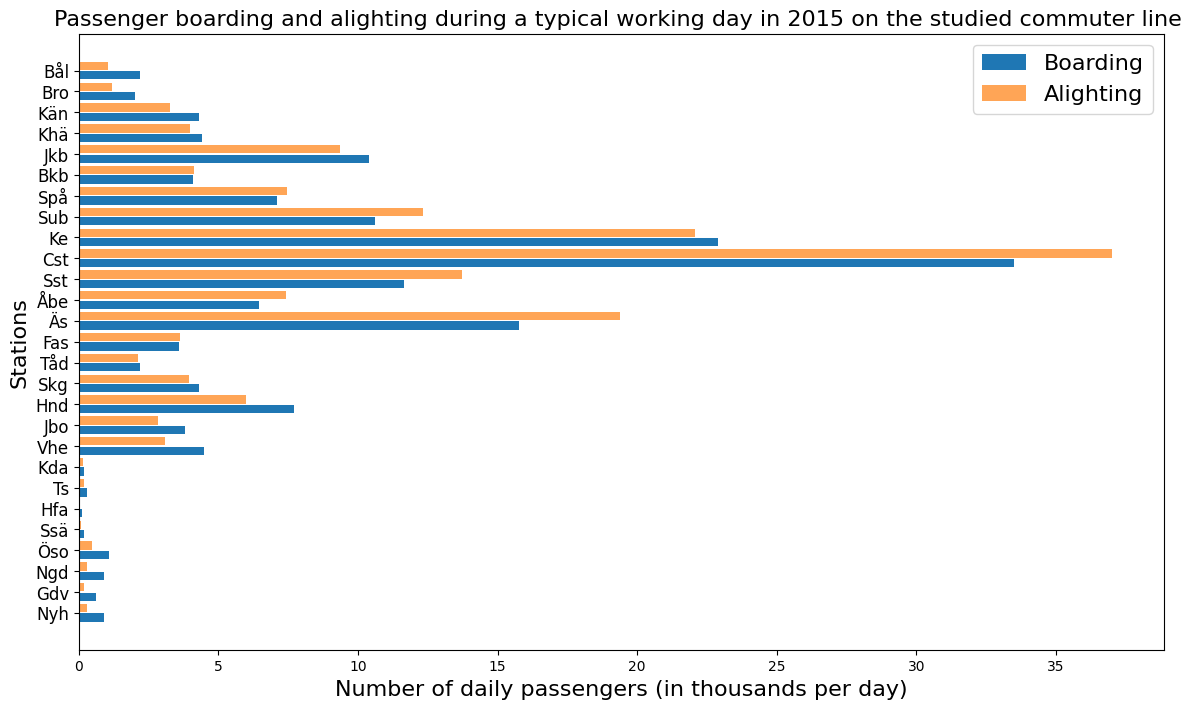

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate boarding and alighting passengers
boarding_all = df_Bal_Nyh.sum(axis=1)
alighting_all = df_Bal_Nyh.sum(axis=0)

# Calculate boarding and alighting passengers
boarding_passengers = boarding_all.loc[studied_line_35]
alighting_passengers = alighting_all.loc[studied_line_35]

# Reorder the data according to valid_values
boarding_passengers = boarding_passengers.reindex(studied_line_35)
alighting_passengers = alighting_passengers.reindex(studied_line_35)

# Define the position of the bars
index = np.arange(len(studied_line_35))
bar_width = 0.4  # Width of the bars
spacing = 0.05  # Spacing between the bars

fig, ax = plt.subplots(figsize=(14, 8))

# Bar plot for boarding passengers
boarding_bars = ax.barh(index - (bar_width / 2 + spacing / 2), boarding_passengers/1000, bar_width, color='tab:blue', label='Boarding')

# Bar plot for alighting passengers
alighting_bars = ax.barh(index + (bar_width / 2 + spacing / 2), alighting_passengers/1000, bar_width, color='tab:orange', alpha=0.7, label='Alighting')

# Add labels and title
ax.set_xlabel('Number of daily passengers (in thousands per day)', fontsize=16)
ax.set_yticks(index, fontsize=12)
ax.set_yticklabels(studied_line_35, fontsize=12)
ax.set_ylabel('Stations', fontsize=16)
ax.set_title('Passenger boarding and alighting during a typical working day in 2015 on the studied commuter line ', fontsize=16)

# Add a legend
ax.legend(fontsize=16)

# Show plot
plt.show()

## Only boarding on the studied line

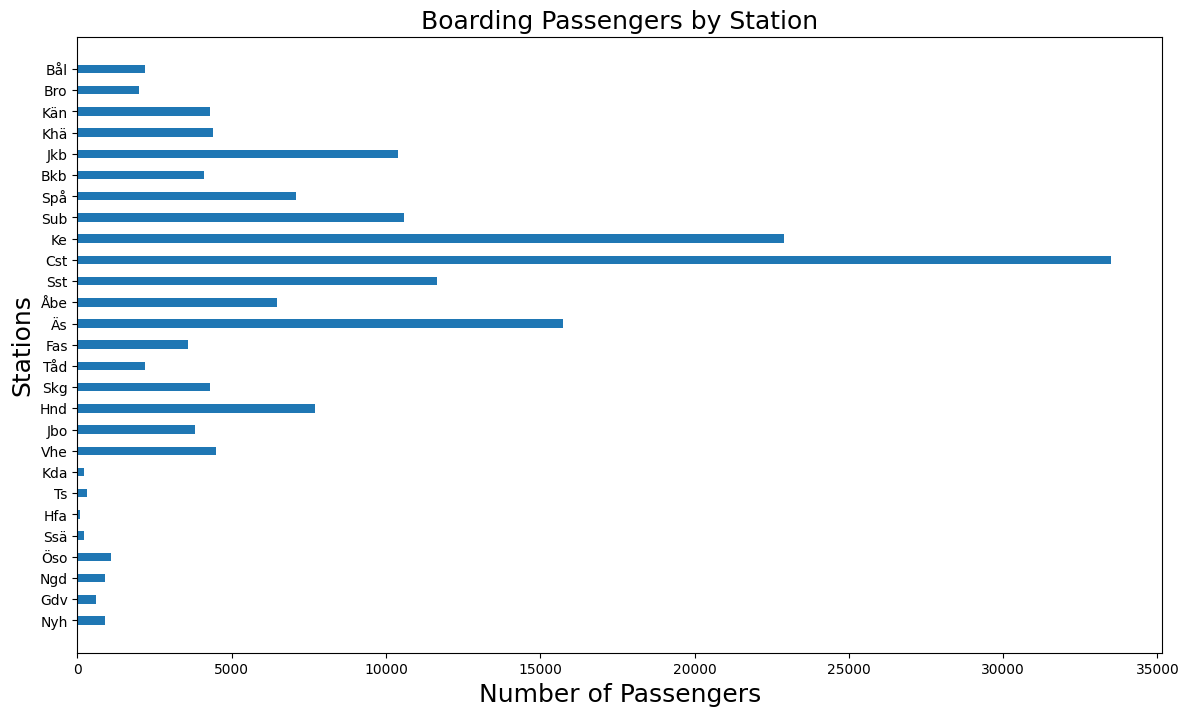

In [8]:
index = np.arange(len(studied_line_35))
bar_width = 0.4  # Width of the bars

fig, ax = plt.subplots(figsize=(14, 8))

# Bar plot for boarding passengers
boarding_bars = ax.barh(index, boarding_passengers, bar_width, color='tab:blue', label='Boarding Passengers')

# Add labels and title
f_size_ticks = 14
f_size_labels = 18
ax.set_xlabel('Number of Passengers', fontsize=f_size_labels)
ax.set_yticks(index, fontsize=f_size_ticks)
ax.set_yticklabels(studied_line_35)
ax.set_ylabel('Stations', fontsize=f_size_labels)
ax.set_title('Boarding Passengers by Station', fontsize=f_size_labels)

# Show plot
plt.show()

## Boarding southwards and northwards

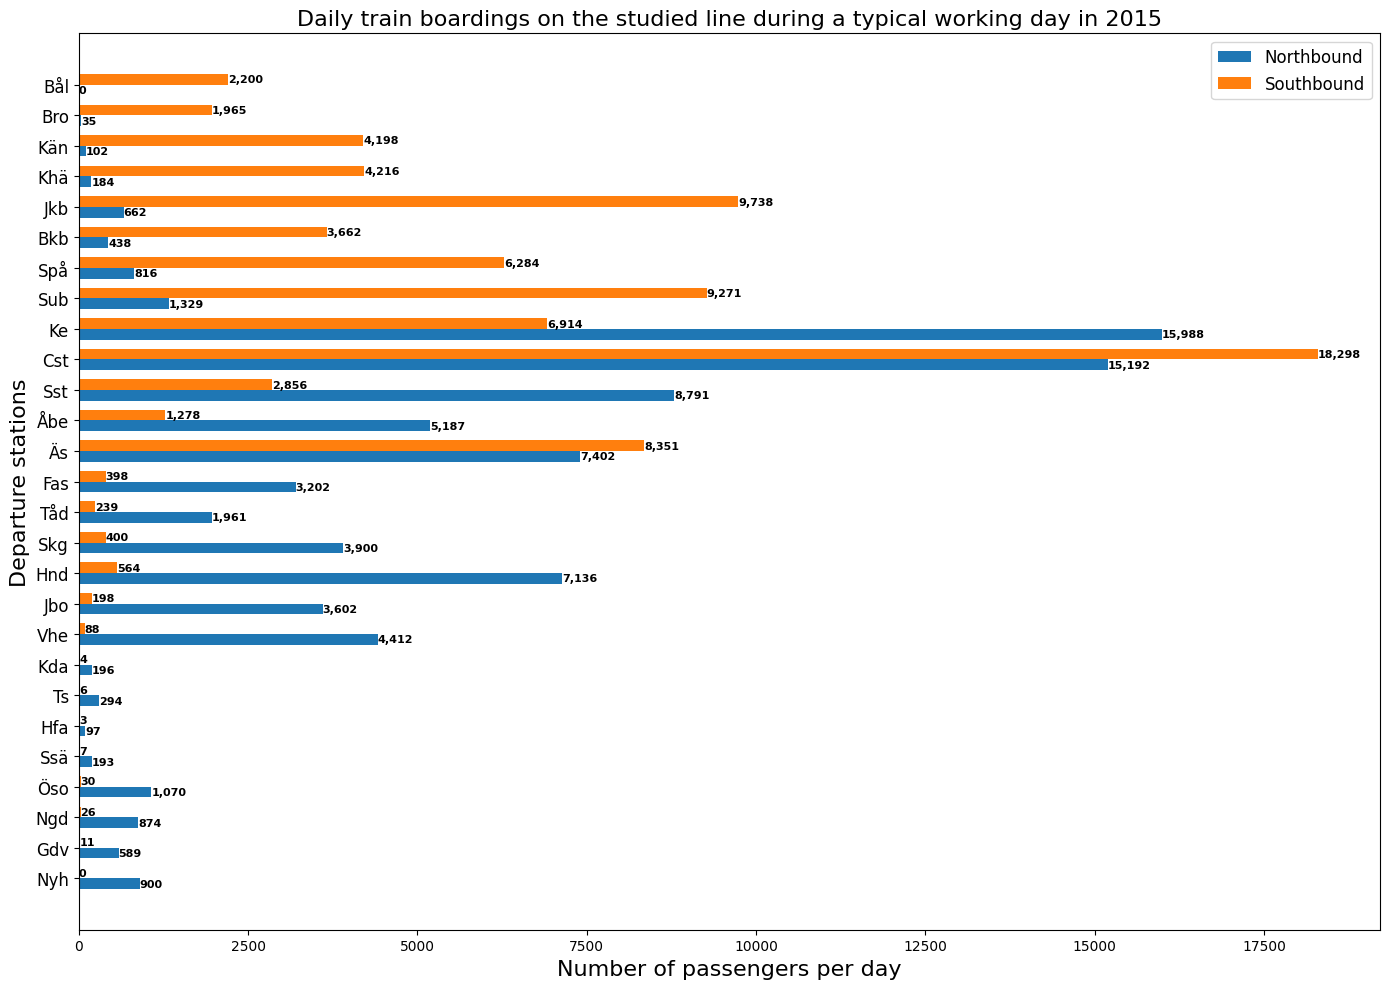

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to calculate northbound and southbound passengers for each station
def calculate_directional_passengers(df, station, valid_values):
    if station not in valid_values:
        raise ValueError(f"Station {station} is not in the valid station list.")
    
    index_station = valid_values.index(station)
    
    # Northbound passengers
    northbound_stations = valid_values[:index_station]  # Stations from beginning to station (excluding station itself)
    northbound_passengers = df.loc[station, northbound_stations].sum()
    
    # Southbound passengers
    southbound_stations = valid_values[index_station+1:]  # Stations from station (excluding station itself) to end
    southbound_passengers = df.loc[station, southbound_stations].sum()
    
    return northbound_passengers, southbound_passengers

# Calculate northbound and southbound passengers for all stations
results = {}
for station in studied_line_35:
    southbound, northbound = calculate_directional_passengers(df_Bal_Nyh, station, studied_line_35)
    results[station] = {'Northbound': northbound, 'Southbound': southbound}

northbound_passengers = [results[station]['Northbound'] for station in studied_line_35]
southbound_passengers = [results[station]['Southbound'] for station in studied_line_35]

index = np.arange(len(studied_line_35))
bar_width = 0.35  # Slightly narrower to accommodate both bars

fig, ax = plt.subplots(figsize=(14, 10))

# Bar plot for northbound passengers
northbound_bars = ax.barh(index - bar_width/2, northbound_passengers, bar_width, 
                          color='tab:blue', label='Northbound')

# Bar plot for southbound passengers
southbound_bars = ax.barh(index + bar_width/2, southbound_passengers, bar_width, 
                          color='tab:orange', label='Southbound')

# Add labels and title
f_size_ticks = 12
f_size_labels = 16
ax.set_xlabel('Number of passengers per day', fontsize=f_size_labels)
ax.set_yticks(index)
ax.set_yticklabels(studied_line_35, fontsize=f_size_ticks)
ax.set_ylabel('Departure stations', fontsize=f_size_labels)
ax.set_title('Daily train boardings on the studied line during a typical working day in 2015', fontsize=f_size_labels)

# Add a legend
ax.legend(fontsize=f_size_ticks)

# Add value labels on the bars
def add_value_labels(bars):
    for bar in bars:
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2, f'{width:,.0f}', 
                ha='left', va='center', fontsize=8, fontweight='bold')

add_value_labels(northbound_bars)
add_value_labels(southbound_bars)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# Dynamic OD (time-dependent, data available every 15min)

## Read dynamic data

In [10]:
# load dataset
input_file = 'C:/Users/AbdouAA/Work Folders/Documents/GitHub/k2-respunkt/data/OD_data_dynamic.xlsx'

df_static = pd.read_excel(input_file, sheet_name='Static', index_col=0, header=0)

# Extract headers and index from the static data
headers = df_static.columns
index = df_static.index

# Number of time periods (every 15 minutes during a full day)
nb_time_periods = int(24 * 60 / 15)  # 96 periods

# Initialize a dictionary to store DataFrames for each time period
df_sheets = {}

# Read specific sheets by index
for t in range(nb_time_periods):
    sheet_name = f"Sheet{t+1}"  # Assuming sheet names are "Sheet1", "Sheet2", ..., "Sheet96"
    df_temp = pd.read_excel(input_file, sheet_name=sheet_name, header=None)  # Read without headers
    
    # Assign the headers and index from the static data
    df_temp.columns = headers
    df_temp.index = index
    
    # Store the DataFrame in the dictionary
    df_sheets[t] = df_temp

# Example: Print a sample from one of the DataFrames to check
print(df_sheets[0].sample(3))

          Bkb       Bro       Bål       Fas       Flb        Gn       Gdv  \
Hel  0.025703  0.012587  0.013851  0.022544  0.071366  0.006148  0.003664   
Bkb  0.000000  0.015395  0.016941  0.027573  0.087288  0.007520  0.004481   
Öte  0.094815  0.046431  0.051094  0.083162  0.263263  0.022681  0.013516   

          Hnd       Hel       Hfa  ...        Tu        Ts       Udl  \
Hel  0.049687  0.000000  0.000613  ...  0.046364  0.001829  0.021285   
Bkb  0.060772  0.038366  0.000749  ...  0.056708  0.002237  0.026034   
Öte  0.183291  0.115712  0.002260  ...  0.171032  0.006746  0.078520   

          Upv         U       Vhe       Åbe        Äs       Öso       Öte  
Hel  0.047708  0.036078  0.028156  0.058915  0.079575  0.006780  0.047031  
Bkb  0.058352  0.044126  0.034437  0.072059  0.097328  0.008293  0.057523  
Öte  0.175990  0.133086  0.103863  0.217331  0.293545  0.025012  0.000000  

[3 rows x 51 columns]


## Update the dynamic OD data to be specific to the studied line

In [11]:
# Define valid station values between Nyh and Bål
studied_line_35 = ['Nyh', 'Gdv', 'Ngd', 'Öso', 'Ssä', 'Hfa', 'Ts', 'Kda', 'Vhe', 'Jbo', 'Hnd', 'Skg', 'Tåd', 'Fas', 'Äs',
                'Åbe', 'Sst', 'Cst', 'Ke', 'Sub', 'Spå', 'Bkb', 'Jkb', 'Khä', 'Kän', 'Bro', 'Bål']

# Update the OD matrix
df_sheets_updated = {}
for t in range(nb_time_periods):
    df_temp = update_OD_Nyh_Bal(df_sheets[t])
    
    # Store the DataFrame in the dictionary
    df_sheets_updated[t] = df_temp.loc[studied_line_35, studied_line_35]

# Basic data explorations
print(df_sheets_updated[0].sample(3))

          Nyh       Gdv       Ngd       Öso       Ssä       Hfa        Ts  \
Åbe  0.019041  0.012634  0.019043  0.023380  0.004207  0.002112  0.006305   
Kda  0.003843  0.002550  0.003843  0.004719  0.000849  0.000426  0.001273   
Ssä  0.008240  0.005467  0.008241  0.010117  0.000000  0.000914  0.002729   

          Kda       Vhe       Jbo  ...       Cst        Ke       Sub  \
Åbe  0.004206  0.097087  0.082122  ...  1.528613  0.272311  0.233041   
Kda  0.000000  0.019595  0.016574  ...  0.308514  0.303039  0.047034   
Ssä  0.001820  0.042012  0.035536  ...  0.661468  0.649731  0.100842   

          Spå       Bkb       Jkb       Khä       Kän       Bro       Bål  
Åbe  0.157520  0.088629  0.228677  0.094970  0.092870  0.043402  0.047761  
Kda  0.031792  0.017888  0.046153  0.019167  0.018744  0.008760  0.009639  
Ssä  0.068163  0.038352  0.098954  0.041096  0.040187  0.018781  0.020667  

[3 rows x 27 columns]


## Visualize the variation over time

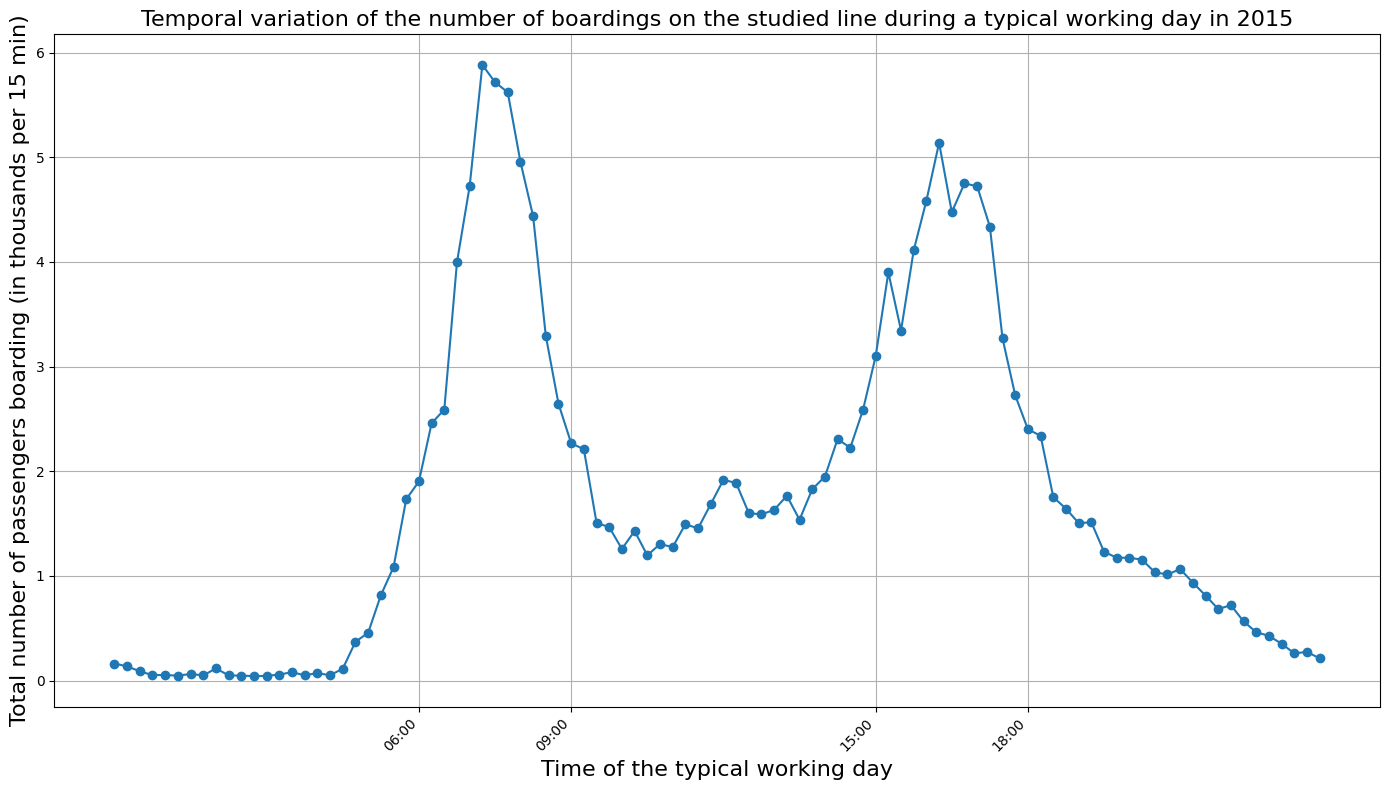

In [19]:

# Extract the number of boardings for each time period
boardings_per_time_period = []
for t in range(nb_time_periods):
    total_boardings = df_sheets_updated[t].sum(axis=1).sum()
    boardings_per_time_period.append(total_boardings)

# Generate time labels for the x-axis
time_labels = pd.date_range(start='00:00', periods=nb_time_periods, freq='15T').strftime('%H:%M')

# Define specific time labels for different periods
specific_times = ['06:00', '09:00', '15:00', '18:00']
specific_indices = [time_labels.tolist().index(time) for time in specific_times]

# Plot the data
plt.figure(figsize=(14, 8))
plt.plot(time_labels, np.array(boardings_per_time_period)/1000, marker='o', linestyle='-', color='tab:blue', label='Boardings')

# Set x-ticks at specific times for better readability
plt.xticks(specific_indices, specific_times, rotation=45, ha='right')
f_size_ticks = 12
f_size_labels = 16
plt.xlabel('Time of the typical working day', fontsize=f_size_labels)
plt.ylabel('Total number of passengers boarding (in thousands per 15 min)', fontsize=f_size_labels)
plt.title('Temporal variation of the number of boardings on the studied line during a typical working day in 2015', fontsize=f_size_labels)
plt.grid(True)
plt.tight_layout()
plt.show()